# Лабораторна робота №5 Випадкових процесів "Марковські процеси з дискретними станами та неперервним часом"

            Виконала Неділько Дарина КМ-91
            
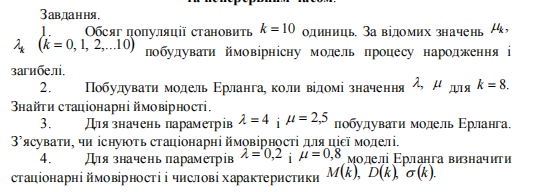

Спочатку запишу усі значення числові, що знадобляться нам у подальному


In [56]:
k <- 10
ke <- 8

muk1 <- 4
lk1 <- 2.5

muk2 <- 0.2
lk2 <- 0.8

Побудуємо ймовірнісну модель процесу народження і загибелі для нашого к

In [57]:
strings <- c()
for ( i in 0:k){
    if (i == 0){
        strings <- c(strings,paste("p'",i," = -lambda",i,"p",i,"(t) + mu",i+1,"p",i+1,"(t)",sep=''))
    } else if (i ==k){
        strings <- c(strings,paste("p'",i," = -(lambda",i," + mu",i,") p",i,"(t) + mu",i-1,"p",i-1,"(t)",sep=''))
    } else{
        strings <- c(strings,paste("p'",i," = -(lambda",i," + mu",i,") p",i,"(t) + mu",i-1,"p",i-1,"(t) + mu",i+1,"p",i+1,"(t)",sep=''))
    }}

for (s in strings){cat("\n|",s)}


| p'0 = -lambda0p0(t) + mu1p1(t)
| p'1 = -(lambda1 + mu1) p1(t) + mu0p0(t) + mu2p2(t)
| p'2 = -(lambda2 + mu2) p2(t) + mu1p1(t) + mu3p3(t)
| p'3 = -(lambda3 + mu3) p3(t) + mu2p2(t) + mu4p4(t)
| p'4 = -(lambda4 + mu4) p4(t) + mu3p3(t) + mu5p5(t)
| p'5 = -(lambda5 + mu5) p5(t) + mu4p4(t) + mu6p6(t)
| p'6 = -(lambda6 + mu6) p6(t) + mu5p5(t) + mu7p7(t)
| p'7 = -(lambda7 + mu7) p7(t) + mu6p6(t) + mu8p8(t)
| p'8 = -(lambda8 + mu8) p8(t) + mu7p7(t) + mu9p9(t)
| p'9 = -(lambda9 + mu9) p9(t) + mu8p8(t) + mu10p10(t)
| p'10 = -(lambda10 + mu10) p10(t) + mu9p9(t)

Тепер побудуємо модель Ерланга, коли значення mu та lambda відомі для k = 8. 

In [58]:
stringsE1 <- c()
for ( i in 0:ke){
    if (i == 0){
        stringsE1 <- c(stringsE1, paste("p'",i," = -lambda","p",i,"(t) + mu*p",i+1,"(t)",sep=''))
    } else if (i == ke){
        stringsE1 <- c(stringsE1, paste("p'",i," = -mu*p",i,"(t) + lambda*p",i-1,"(t)",sep=''))
    } else{
        stringsE1 <- c(stringsE1, paste("p'",i," = -(lambda + mu) p",i,"(t) + lambda*p",i-1,"(t) + mu*p",i+1,"(t)",sep=''))
    }}

for (s in stringsE1){cat("\n|",s)}


| p'0 = -lambdap0(t) + mu*p1(t)
| p'1 = -(lambda + mu) p1(t) + lambda*p0(t) + mu*p2(t)
| p'2 = -(lambda + mu) p2(t) + lambda*p1(t) + mu*p3(t)
| p'3 = -(lambda + mu) p3(t) + lambda*p2(t) + mu*p4(t)
| p'4 = -(lambda + mu) p4(t) + lambda*p3(t) + mu*p5(t)
| p'5 = -(lambda + mu) p5(t) + lambda*p4(t) + mu*p6(t)
| p'6 = -(lambda + mu) p6(t) + lambda*p5(t) + mu*p7(t)
| p'7 = -(lambda + mu) p7(t) + lambda*p6(t) + mu*p8(t)
| p'8 = -mu*p8(t) + lambda*p7(t)

Для знаходження стаціонарних ймовірностей спочатку необхідно привести систему до стаціонарного режиму.

In [59]:
stringsE1S <- c()
for ( i in 0:ke){
    if (i == 0){
        stringsE1S <- c(stringsE1S, paste("lambda*p",i," = mu*p",i+1,sep=''))
    } else if (i ==ke){
        stringsE1S <- c(stringsE1S, paste("mu*p",i," = lambda*p",i-1,sep=''))
    } else{
        stringsE1S <- c(stringsE1S, paste("(lambda + mu)p",i," = lambda*p",i-1," + mu*p",i+1,sep=''))
    }}

for (s in stringsE1S){cat("\n|",s)}


| lambda*p0 = mu*p1
| (lambda + mu)p1 = lambda*p0 + mu*p2
| (lambda + mu)p2 = lambda*p1 + mu*p3
| (lambda + mu)p3 = lambda*p2 + mu*p4
| (lambda + mu)p4 = lambda*p3 + mu*p5
| (lambda + mu)p5 = lambda*p4 + mu*p6
| (lambda + mu)p6 = lambda*p5 + mu*p7
| (lambda + mu)p7 = lambda*p6 + mu*p8
| mu*p8 = lambda*p7

Який вигляд вона матиме за умови, що $\rho = \frac{\lambda}{\mu}$:

In [60]:
stringsE1S <- c()
for ( i in 0:ke){
    if (i == 0){
        stringsE1S <- c(stringsE1S, paste("p",i+1," = rho*p",i,sep=''))
    } else if (i ==ke){
        stringsE1S <- c(stringsE1S, paste("p",i," = rho*p",i-1,sep=''))
    } else{
        stringsE1S <- c(stringsE1S, paste("(1+rho)p",i," = rho*p",i-1," + p",i+1,sep=''))
    }}

for (s in stringsE1S){cat("\n|",s)}


| p1 = rho*p0
| (1+rho)p1 = rho*p0 + p2
| (1+rho)p2 = rho*p1 + p3
| (1+rho)p3 = rho*p2 + p4
| (1+rho)p4 = rho*p3 + p5
| (1+rho)p5 = rho*p4 + p6
| (1+rho)p6 = rho*p5 + p7
| (1+rho)p7 = rho*p6 + p8
| p8 = rho*p7

З цих рівнянь визначаємо значення $p_n$

In [61]:
ps <- c()

for (i in 1:ke){
    ps <- c(ps, paste("p",i," = (rho^",i,")*p0", sep=""))
}

for (s in ps){cat("\n|",s)}


| p1 = (rho^1)*p0
| p2 = (rho^2)*p0
| p3 = (rho^3)*p0
| p4 = (rho^4)*p0
| p5 = (rho^5)*p0
| p6 = (rho^6)*p0
| p7 = (rho^7)*p0
| p8 = (rho^8)*p0

Стаціонарні ймовірності для цієї системи $p_i = \frac{\rho^i}{\sum_{k=0}^{7} \rho^k}, i = \overline{0..7}$

$p_0= \frac{1}{\sum_{k=0}^{7} \rho^k}$

$p_1 = \frac{\rho}{\sum_{k=0}^{7} \rho^k}$

$p_2 = \frac{\rho^2}{\sum_{k=0}^{7} \rho^k}$

$p_3 = \frac{\rho^3}{\sum_{k=0}^{7} \rho^k}$

$p_4 = \frac{\rho^4}{\sum_{k=0}^{7} \rho^k}$

$p_5 = \frac{\rho^5}{\sum_{k=0}^{7} \rho^k}$

$p_6 = \frac{\rho^6}{\sum_{k=0}^{7} \rho^k}$

$p_7 = \frac{\rho^7}{\sum_{k=0}^{7} \rho^k}$

$p_8 = \frac{\rho^8}{\sum_{k=0}^{7} \rho^k}$

Будуємо модель Ерланга для $\lambda = 4, \mu = 2.5$

In [78]:
rho = print( 4/2.5, quotes = NULL)


[1] 1.6


Оскільки $\rho$ >0 - не може існувати!

Нехай $\lambda = 0.2, \mu = 0.8, \rho = 0.25 <1$

In [81]:
stringsE1N <- gsub("lambda","0.2",stringsE1)
stringsE1N <- gsub("mu","0.8",stringsE1N)
stringsE1SN <- gsub("rho","0.25",stringsE1S)

for (s in stringsE1N){cat("\n|",s)}
cat("\n ---------")
for (s in stringsE1SN){cat("\n|",s)}


| p'0 = -0.2p0(t) + 0.8*p1(t)
| p'1 = -(0.2 + 0.8) p1(t) + 0.2*p0(t) + 0.8*p2(t)
| p'2 = -(0.2 + 0.8) p2(t) + 0.2*p1(t) + 0.8*p3(t)
| p'3 = -(0.2 + 0.8) p3(t) + 0.2*p2(t) + 0.8*p4(t)
| p'4 = -(0.2 + 0.8) p4(t) + 0.2*p3(t) + 0.8*p5(t)
| p'5 = -(0.2 + 0.8) p5(t) + 0.2*p4(t) + 0.8*p6(t)
| p'6 = -(0.2 + 0.8) p6(t) + 0.2*p5(t) + 0.8*p7(t)
| p'7 = -(0.2 + 0.8) p7(t) + 0.2*p6(t) + 0.8*p8(t)
| p'8 = -0.8*p8(t) + 0.2*p7(t)
 ---------
| p1 = 0.25*p0
| (1+0.25)p1 = 0.25*p0 + p2
| (1+0.25)p2 = 0.25*p1 + p3
| (1+0.25)p3 = 0.25*p2 + p4
| (1+0.25)p4 = 0.25*p3 + p5
| (1+0.25)p5 = 0.25*p4 + p6
| (1+0.25)p6 = 0.25*p5 + p7
| (1+0.25)p7 = 0.25*p6 + p8
| p8 = 0.25*p7

Стаціонарні ймовірності

In [83]:
rho<- 0.25

for (i in 0:ke){ cat ("\np",i," = ", (rho^i)/(sum(sapply(1:ke,function(z) rho^z))))}


p 0  =  3.000046
p 1  =  0.7500114
p 2  =  0.1875029
p 3  =  0.04687572
p 4  =  0.01171893
p 5  =  0.002929732
p 6  =  0.0007324331
p 7  =  0.0001831083
p 8  =  4.577707e-05

Шукаємо математичне сподівання $M(k) = \frac{\rho}{1-\rho}$

In [84]:
Mk <- rho/(1-rho)
# Mk2 <- (rho^2+rho)/((1-rho)^2)
cat("\nM(k) = ", Mk)


M(k) =  0.3333333

Значення дисперсії $D(k) = \frac{\rho}{(1-\rho)^2}$

In [85]:
Dk <- rho/((1-rho)^2)

cat("D(k) = ", Dk)

D(k) =  0.4444444